In [1]:
import sqlite3

# ბაზასთან კავშირის დამყარება
conn = sqlite3.connect("students_performance.sqlite")
cursor = conn.cursor()

# კავშირის დახურვა
conn.close()

#ეს კოდი ქმნის კავშირს ბაზასთან და შემდეგ ამ კავშირს ხურავს, რათა რესურსები არ დაიკავოს.

In [2]:
conn = sqlite3.connect("students_performance.sqlite")
cursor = conn.cursor()

# ამოიღებს სტუდენტებს, რომელთა GPA მეტია 3.5-ზე
cursor.execute("SELECT StudentID, Age, GPA FROM students WHERE GPA > 3.5")
result = cursor.fetchall()

for row in result:
    print(row)

conn.close()

#ამ კოდის დახმარებით ამოვიღებთ ყველა იმ სტუდენტის ინფორმაციას, ვისაც მაღალი ქულა (GPA > 3.5) აქვს.

(1010, 16, 3.5734742103297656)
(1045, 18, 4.0)
(1092, 18, 3.5069200713692137)
(1093, 16, 3.552286943350944)
(1112, 17, 3.5451594318003106)
(1120, 15, 3.619460869693516)
(1127, 16, 3.5350037581843186)
(1133, 15, 3.5824218723119596)
(1147, 17, 3.5888879397650117)
(1163, 18, 3.7185869042869646)
(1308, 16, 3.64573804877044)
(1364, 16, 3.8806400848697424)
(1424, 17, 3.770694721842285)
(1443, 15, 4.0)
(1455, 15, 3.5877355870777485)
(1505, 17, 3.9470929642201784)
(1510, 16, 3.666290826527483)
(1528, 16, 3.8649768612963977)
(1558, 16, 3.646516388949796)
(1590, 15, 3.5662831299671103)
(1683, 17, 3.560791672128213)
(1690, 16, 3.625921730346796)
(1717, 17, 3.5169407207158963)
(1820, 15, 3.9417600224442615)
(1877, 16, 3.577043897429733)
(1885, 18, 3.7079480402167513)
(1920, 18, 3.8695867242043698)
(1926, 17, 3.5106808899730706)
(1952, 18, 3.836698640240594)
(1962, 15, 3.576909015459067)
(1998, 18, 3.512322894833646)
(2021, 17, 3.520612391633881)
(2024, 16, 3.5921289778598062)
(2036, 16, 3.53919871

In [8]:
import sqlite3

conn = sqlite3.connect("students_performance.sqlite")
cursor = conn.cursor()

name = input("შეიყვანეთ ID: ")
age = int(input("შეიყვანეთ ასაკი: "))
gender = input("შეიყვანეთ სქესი (Male/Female): ")
gpa = float(input("შეიყვანეთ GPA: "))

cursor.execute("INSERT INTO students (StudentID, Age, Gender, GPA) VALUES (?, ?, ?, ?)", (name, age, gender, gpa))
conn.commit()
print("ჩანაწერი წარმატებით დაემატა.")





# ეს კოდი მომხმარებლის მიერ შეყვანილ მონაცემებს ამატებს students ცხრილში

შეიყვანეთ ID:  474859
შეიყვანეთ ასაკი:  20
შეიყვანეთ სქესი (Male/Female):  Male
შეიყვანეთ GPA:  3.8


ჩანაწერი წარმატებით დაემატა.


In [9]:
import sqlite3

conn = sqlite3.connect("students_performance.sqlite")
cursor = conn.cursor()

student_id = int(input("შეიყვანეთ StudentID რომლის GPA გსურთ შეცვალოთ: "))
new_gpa = float(input("შეიყვანეთ ახალი GPA: "))

cursor.execute("UPDATE students SET GPA = ? WHERE StudentID = ?", (new_gpa, student_id))
conn.commit()
print("GPA განახლდა.")

conn.close()


# ეს კოდი განაახლებს სტუდენტის GPA-ს, რომლის ID შეყვანილია მომხმარებლის მიერ

შეიყვანეთ StudentID რომლის GPA გსურთ შეცვალოთ:  1
შეიყვანეთ ახალი GPA:  4.0


GPA განახლდა.


In [11]:
import sqlite3

conn = sqlite3.connect("students_performance.sqlite")
cursor = conn.cursor()

student_id = int(input("შეიყვანეთ StudentID რომლის წაშლაც გსურთ: "))

cursor.execute("DELETE FROM students WHERE StudentID = ?", (student_id,))
conn.commit()
print("ჩანაწერი წაიშალა.")

conn.close()

# ეს კოდი წაშლის სტუდენტის ჩანაწერს მოცემული ID-ის მიხედვით


შეიყვანეთ StudentID რომლის წაშლაც გსურთ:  1


ჩანაწერი წაიშალა.


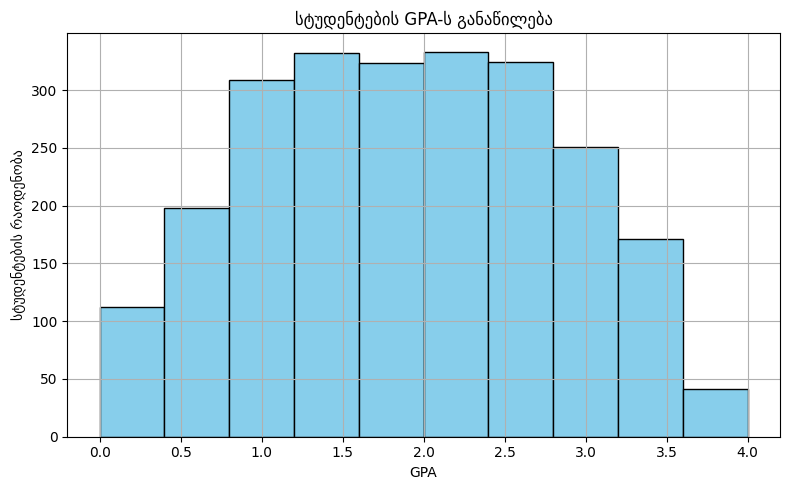

In [17]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

# მონაცემთა ბაზასთან დაკავშირება
conn = sqlite3.connect("students_performance.sqlite")
query = "SELECT * FROM students"
df = pd.read_sql(query, conn)

# GPA-ს განაწილება ჰისტოგრამით
plt.figure(figsize=(8,5))
plt.hist(df['GPA'], bins=10, color='skyblue', edgecolor='black')
plt.title("სტუდენტების GPA-ს განაწილება")
plt.xlabel("GPA")
plt.ylabel("სტუდენტების რაოდენობა")
plt.grid(True)
plt.tight_layout()
plt.show()

conn.close()

In [13]:
!pip install pandas

     --------------------------------------- 11.1/11.1 MB 20.4 MB/s eta 0:00:00
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
     ------------------------------------- 509.2/509.2 kB 15.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


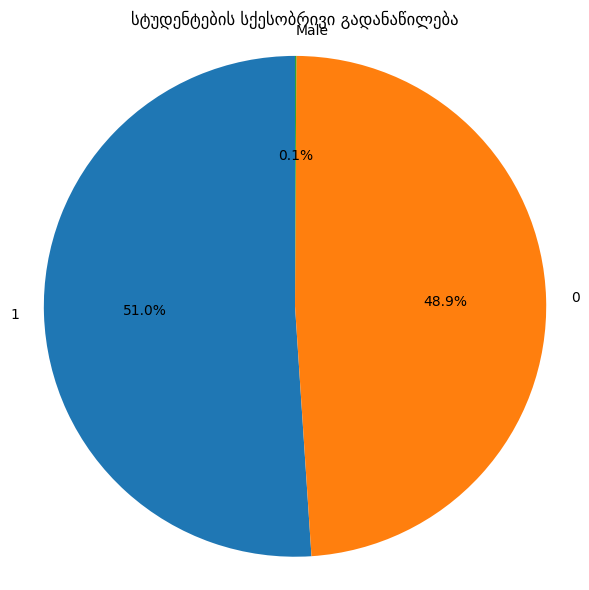

In [22]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

# მონაცემთა ბაზასთან დაკავშირება
conn = sqlite3.connect("students_performance.sqlite")
query = "SELECT * FROM students"
df = pd.read_sql(query, conn)

# სქესის მიხედვით რაოდენობა
gender_counts = df['Gender'].value_counts()

# Pie Chart - სტუდენტების სქესობრივი გადანაწილება
plt.figure(figsize=(6,6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("სტუდენტების სქესობრივი გადანაწილება")
plt.axis('equal')
plt.tight_layout()
plt.show()

conn.close()

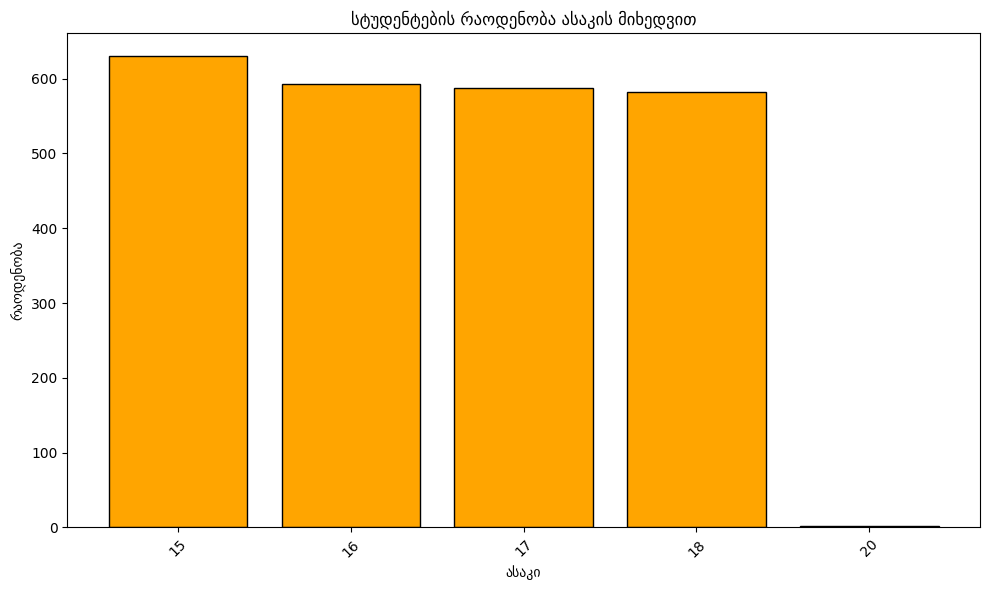

In [23]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

# მონაცემთა ბაზასთან დაკავშირება
conn = sqlite3.connect("students_performance.sqlite")
query = "SELECT * FROM students"
df = pd.read_sql(query, conn)

# ასაკის მიხედვით რაოდენობის დათვლა
age_counts = df['Age'].value_counts().sort_index()

# Bar Chart - ასაკის მიხედვით სტუდენტების რაოდენობა
plt.figure(figsize=(10,6))
plt.bar(age_counts.index.astype(str), age_counts.values, color='orange', edgecolor='black')
plt.title("სტუდენტების რაოდენობა ასაკის მიხედვით")
plt.xlabel("ასაკი")
plt.ylabel("რაოდენობა")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

conn.close()
